## Problem Defination

Target: Energy kcal (calories)

Primary Features: Carbs, Protein, Fat

Optional Features: Fibre, Freesugar, Cholesterol, Calcium, food category

Goal: Build a model that predicts calories from macro data and corrects deviations from standard formula.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
df = pd.read_csv('kcal.csv')
df.head()

,Energy kcal,Carbs,Protein(g),Fat(g),Freesugar(g),Fibre(g),Cholestrol(mg),Calcium(mg),Predicted_kcal,residuals
0,300.0,50.0,7.0,10.0,2.0,2.0,15.0,50.0,318.0,-18.0
1,200.0,30.0,2.0,8.0,20.0,0.5,20.0,20.0,200.0,0.0
2,250.0,30.0,3.0,12.0,10.0,1.0,20.0,20.0,240.0,10.0
3,312.0,41.0,3.4,15.0,0.3,3.8,0.0,20.0,312.6,-0.6
4,200.0,25.0,4.0,10.0,1.0,1.0,10.0,30.0,206.0,-6.0


In [3]:
# defining independent and dependent/target features

y = df["Energy kcal"]
X = df[["Carbs", "Protein(g)", "Fat(g)"]]

In [4]:
X

,Carbs,Protein(g),Fat(g)
0,50.00,7.00,10.00
1,30.00,2.00,8.00
2,30.00,3.00,12.00
3,41.00,3.40,15.00
4,25.00,4.00,10.00
...,...,...,...
1023,6.55,1.26,3.24
1024,6.32,1.98,6.55
1025,31.85,0.97,6.01
1026,6.48,0.91,0.30


In [5]:
y

0       300.00
1       200.00
2       250.00
3       312.00
4       200.00
         ...  
1023     60.88
1024     91.21
1025    176.07
1026     33.07
1027    289.79
Name: Energy kcal, Length: 1028, dtype: float64

In [6]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42)

In [7]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((801, 3), (801,), (227, 3), (227,))

## Model Training

In [8]:
lnr_regression = LinearRegression()

In [9]:
lnr_regression.fit(X_train,y_train)

LinearRegression()

#### Note:
- In this version we didn't apply Standard Scaler because our features (Carbs, Protein, Fat) are already in the same natural unit (grams). 
- Scaling would change the coefficients into "per standard deviation" units, making them harder to interpret. By keeping the raw values, the model coefficients directly reflect calories per gram (close to the 4-4-9 rule), which is more meaningful for nutritional analysis.


In [10]:
## cross validation 
val_score = cross_val_score(
    lnr_regression, X_train, y_train,
    scoring='neg_mean_squared_error',
    cv=3
)

In [11]:
val_score

array([-535.57889823, -379.8545676 , -340.98199791])

In [12]:
np.mean(val_score)                   # mean of the negative MSEs
rmse = np.sqrt(-np.mean(val_score))  # flip sign, take sqrt → RMSE
print(rmse)

20.464729526175837


In [13]:
## slope or coefficients
print("Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lnr_regression.coef_
})
print(coef_df)


Coefficients:
      Feature  Coefficient
0       Carbs     4.137016
1  Protein(g)     2.352525
2      Fat(g)     9.008567


In [14]:
print("Intercept:", lnr_regression.intercept_)

Intercept: 0.2938274623957682


## Prediction, Performance, & Evalutaion Metrices

In [15]:
y_pred = lnr_regression.predict(X_test)

In [16]:
y_pred

array([836.21285672,  24.82146204, 679.14363977, 223.69585784,
       477.27317204, 388.38825257,  49.98728143, 119.83037057,
       138.11954388, 118.15279029, 138.96137046,  56.78529303,
        95.6241572 , 181.43104366, 254.83576856, 188.48120868,
        89.43841205, 696.73084912, 487.8100516 , 486.70677047,
       130.43104916, 285.63697814, 204.6366664 ,  96.28135538,
       575.63562299, 278.70250465, 368.781196  , 156.48221938,
       171.92243329, 210.04852489,  87.20836166, 191.1359161 ,
        49.71371239,  87.24873786, 200.02313472,  54.95810444,
       452.17564922, 210.73115134, 140.08088171,  79.95477411,
       205.69017871, 355.87975008, 127.81169943, 595.24322515,
       116.52758176,  31.2159413 , 178.25777957, 178.13880285,
       469.16915678, 406.22467681,  93.61744764, 670.95281978,
       273.90506951,  10.17189143, 182.3656056 , 316.1288888 ,
       170.48238471, 188.22620418, 228.91459726, 291.82402919,
        77.53318515, 304.01709176, 302.69247271, 120.30

In [17]:
y_test

428    839.33
533     26.74
388    681.28
107    238.09
423    475.33
        ...  
816    425.19
215    124.56
753    207.57
448     15.91
964    253.77
Name: Energy kcal, Length: 227, dtype: float64

In [18]:
## Performance Metrics
print("Performance Metrics:")
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print("------")
##Evaluation Metics
print("Evaluation Metrics:")
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"RMSE: {rmse:.2f}")

Performance Metrics:
MSE: 379.7644
MAE: 8.4596
------
Evaluation Metrics:
R²: 0.9900
Adjusted R²: 0.9899
RMSE: 19.49


## Assumptions

Text(0, 0.5, 'Test Predicted Data')

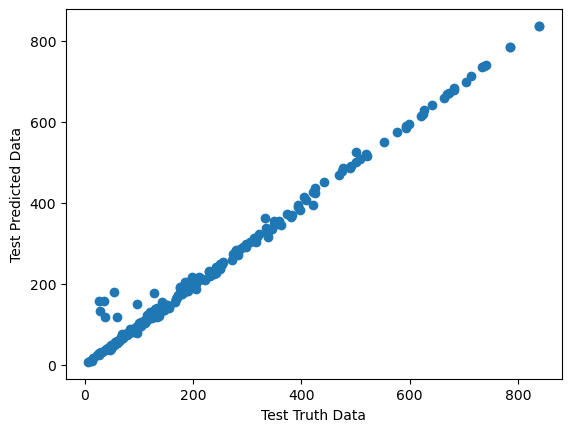

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [20]:
residuals=y_test-y_pred

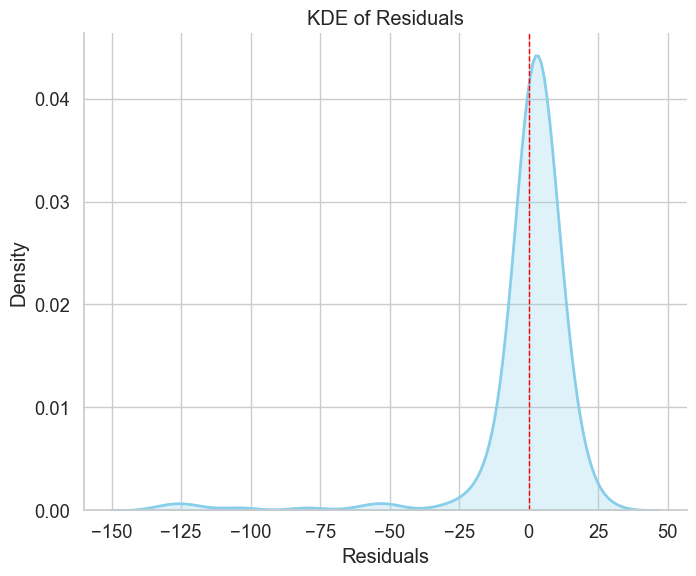

In [21]:

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# KDE plot
sns.displot(residuals, kind='kde', height=6, aspect=1.2, fill=True, color='skyblue', linewidth=2)
plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("KDE of Residuals")

plt.tight_layout()
plt.show()

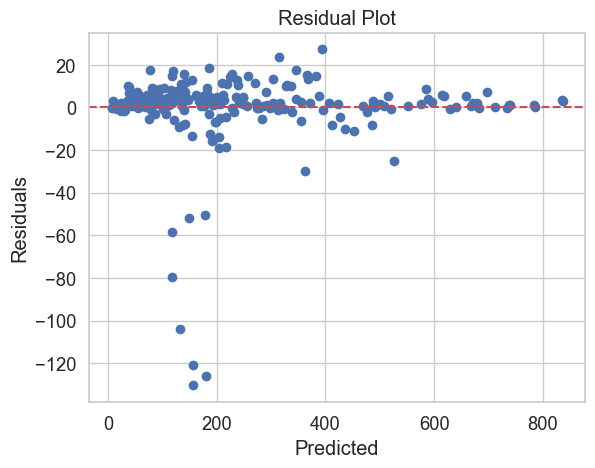

In [22]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

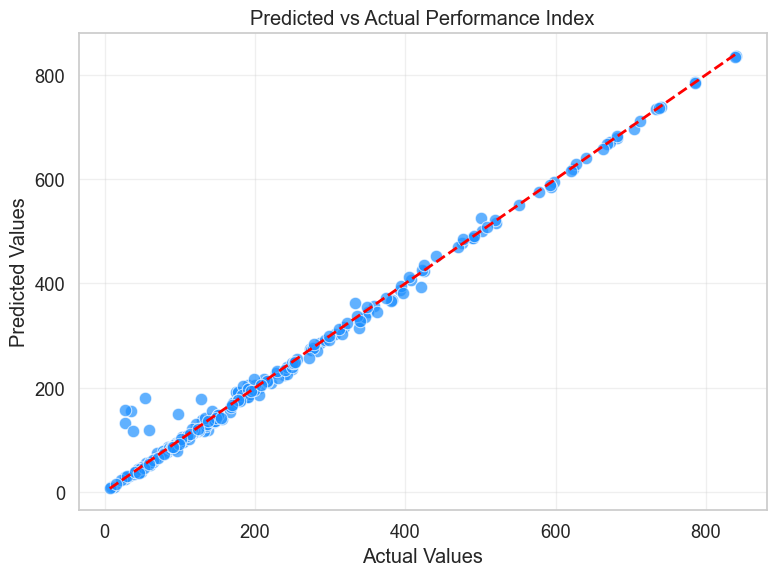

In [23]:
# Optional: set a nicer Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(8, 6))

# Scatter points with alpha for transparency
sns.scatterplot(
    x=y_test, 
    y=y_pred, 
    color='dodgerblue', 
    s=80,  # slightly larger points
    edgecolor='w',  # white edge for better visibility
    alpha=0.7
)

# 45-degree reference line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Performance Index")

# Optional: add a grid with subtle lines
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pickle
import os

os.makedirs("models", exist_ok=True)

# Save model
with open("models/model.pkl", "wb") as f:
    pickle.dump(lnr_regression, f)